## Using multiple models to find the best differential equation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import differential_eq as de

In [2]:
# Models can be added or removed for testing
tumormodels = (
    de.Linear,
    de.LinearLimited,
    de.Exponential,
    de.ExponentialAddition,
    de.Mendelsohn,
    de.Montroll,
    de.Logistic,
    de.Gompertz
)

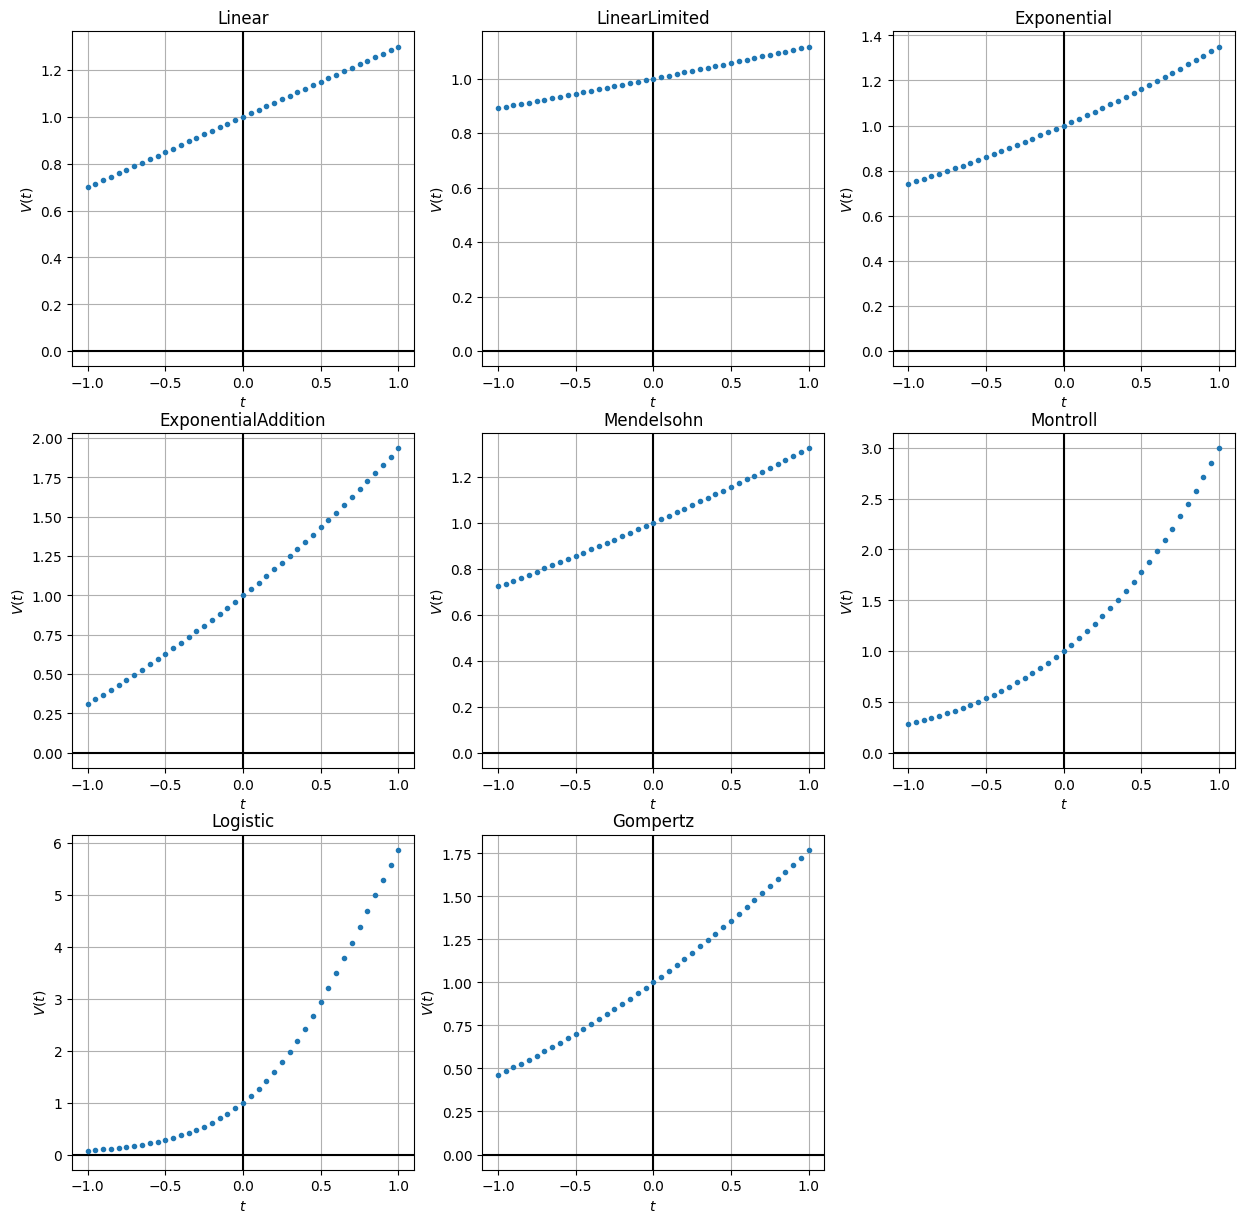

In [ ]:
# Parameters can be changed for testing
parameters = {'c':0.3, 'y0':1.0, 'd':0.5, 'V_max':9.00, "V_max^d":5.00}
ts = [i / 20 - 1.0 for i in range(41)]

plt.figure(figsize=(15, 20))

for fig, tumormodel in enumerate(tumormodels, start=1):
    # All models use the runge-kutta, direct fitter and BIC score options
    model = tumormodel(solver="runge-kutta", fitter="direct", solution="BIC")

    # y-values are predicted with runge-kutta
    Vs = [model.runge_kutta(t, None, parameters) for t in ts]

    # Plotting the calculated y-values with parameters (each model)
    plt.subplot(4, 3, fig)
    plt.axhline(0.0, color='k'); plt.axvline(0.0, color='k')
    plt.plot(ts, Vs, '.')
    plt.title(model.__class__.__name__)
    plt.xlabel('$t$'); plt.ylabel('$V(t)$')
    plt.grid(True)
    
plt.show()

In [4]:
# The x- (t) and y-values (V)
tdata = [
     3.46,  4.58,  5.67,  6.64,  7.63,  8.41,  9.32, 10.27, 11.19,
    12.39, 13.42, 15.19, 16.24, 17.23, 18.18, 19.29, 21.23, 21.99,
    24.33, 25.58, 26.43, 27.44, 28.43, 30.49, 31.34, 32.34, 33.00,
    35.20, 36.34, 37.29, 38.50, 39.67, 41.37, 42.58, 45.39, 46.38,
    48.29, 49.24, 50.19, 51.14, 52.10, 54.00, 56.33, 57.33, 59.38,
]
Vdata = [
    0.0158, 0.0264, 0.0326, 0.0445, 0.0646, 0.0933, 0.1454, 0.2183, 0.2842,
    0.4977, 0.6033, 0.8441, 1.2163, 1.4470, 2.3298, 2.5342, 3.0064, 3.4044,
    3.2046, 4.5241, 4.3459, 5.1374, 5.5376, 4.8946, 5.0660, 6.1494, 6.8548,
    5.9668, 6.6945, 6.6395, 6.8971, 7.2966, 7.2268, 6.8815, 8.0993, 7.2112,
    7.0694, 7.4971, 6.9974, 6.7219, 7.0523, 7.1095, 7.0694, 8.0562, 7.2268, 
]

# Scaling the x-values (t) from -1.0 to 1.0
tmin, tmax = min(tdata), max(tdata)
tdata = [2.0 * (t - tmin) / (tmax - tmin) - 1.0 for t in tdata]

# Scaling y-values (V) from 0.0 to 1.0
Vmax = max(Vdata)
Vdata = [V / Vmax for V in Vdata]

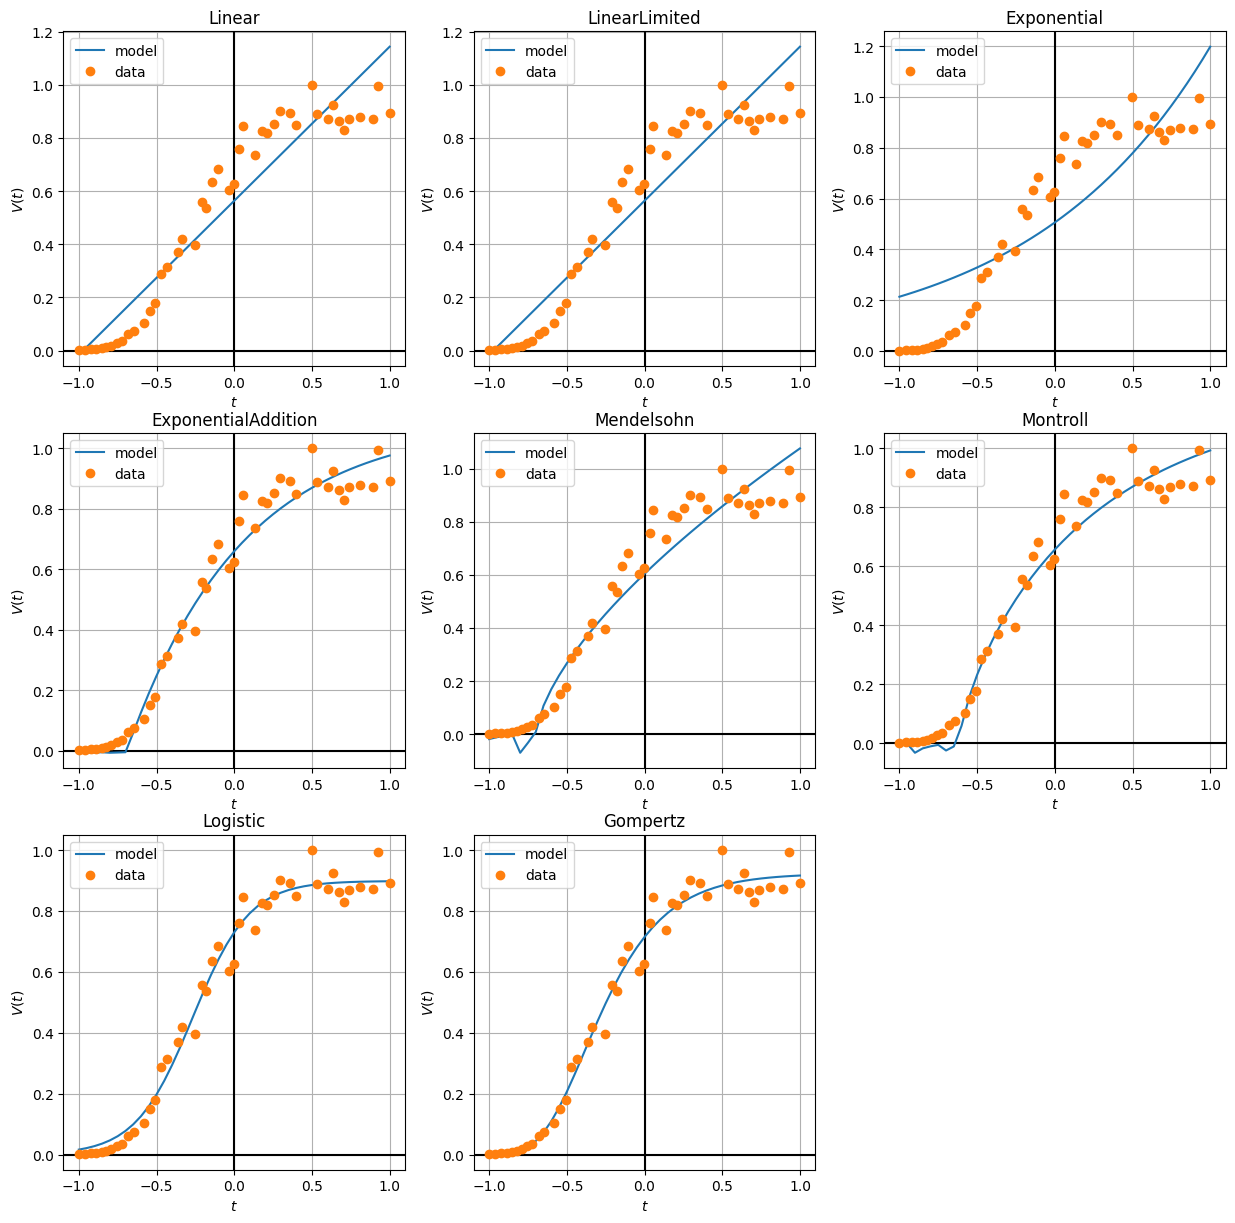

In [5]:
# Dict for dataframe
results = {'model': [], 'formula': [], 'BIC': [], 'AICc': []}

plt.figure(figsize=(15, 20))

for fig, tumormodel in enumerate(tumormodels, start=1):
    # All models use the runge-kutta, direct fitter and BIC score options
    model = tumormodel(solver='runge-kutta', fitter="direct", solution="BIC")
    # each model is fitted on the scaled x- and y-values
    model.fit(tdata, Vdata)

    # Values for the dataframe are made
    results['model'].append(repr(model))
    results['formula'].append(str(model))
    results['BIC'].append(model.quality(tdata, Vdata))
    results['AICc'].append(model.aicc(tdata, Vdata))

    # predict y-values with the fitted parameters
    Vs = [model.runge_kutta(t) for t in ts]

    # Plot with predicted vs actual y-values 
    plt.subplot(4, 3, fig)
    plt.axhline(0.0, color='k'); plt.axvline(0.0, color='k')
    plt.plot(ts, Vs, '-', label='model')
    plt.plot(tdata, Vdata, 'o', label='data')
    plt.title(model.__class__.__name__)
    plt.xlabel('$t$'); plt.ylabel('$V(t)$')
    plt.grid(True); plt.legend()
   
plt.show()

In [6]:
# Dataframe is made from the dict
pd.DataFrame(results).set_index('model').sort_values('BIC')

,formula,BIC,AICc
model,,,
"Gompertz(solver=runge-kutta, fitter=direct, solution=BIC)",3.53 ⋅ V ⋅ ln( 0.92 / V),-270.367849,-275.202471
"Logistic(solver=runge-kutta, fitter=direct, solution=BIC)",6.09 ⋅ ( 0.90 - V),-264.819889,-269.654510
"ExponentialAddition(solver=runge-kutta, fitter=direct, solution=BIC)",-1.35 ⋅ V + 1.47,-245.335949,-250.170571
"Montroll(solver=runge-kutta, fitter=direct, solution=BIC)",-0.86 ⋅ V ⋅ 0.79 - V^-1.39,-236.915443,-243.142093
"Mendelsohn_growth(solver=runge-kutta, fitter=direct, solution=BIC)",0.43 ⋅ V^-0.54,-208.930668,-213.765290
"Linear(solver=runge-kutta, fitter=direct, solution=BIC)",0.58,-186.215621,-189.543232
"LinearLimited(solver=runge-kutta, fitter=direct, solution=BIC)",0.58 ⋅ V / (V ⋅ -37.33),-182.408959,-187.243580
"Exponential(solver=runge-kutta, fitter=direct, solution=BIC)",0.86 ⋅ V,-144.816238,-148.143849
